<a href="https://colab.research.google.com/github/Habacef/VMD-plotting/blob/main/RMSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
from scipy.interpolate import make_interp_spline
from scipy.stats import rankdata, mannwhitneyu

Uploading the data and storing its name in a variable

In [ ]:
from google.colab import files


print("Please upload a combined measurement file in txt format")
measurement = files.upload()

for name, data in measurement.items():
  measurement_name = name

if not measurement:
    user_input = input("Please type filename for raw-data: ")
    # Store user_input in a variable
    measurement_name = user_input

Please upload a combined measurement file in txt format


Please type filename for raw-data: s


Check the data

In [ ]:
df = pd.read_csv(measurement_name,delimiter='\s+',)
df = df.drop("frame", axis=1)
#df = df.drop("mol3", axis=1)
print(df)

       mol0   mol1   mol2   mol3   mol4
0     0.792  0.808  0.730  0.853  0.000
1     0.792  0.808  0.730  0.853  0.000
2     1.131  1.100  1.316  1.346  1.344
3     1.289  1.200  1.458  1.375  1.332
4     1.359  1.391  1.565  1.440  1.331
...     ...    ...    ...    ...    ...
1997  2.792  3.037  2.208  3.036  2.737
1998  2.885  2.811  2.290  3.157  2.537
1999  2.705  2.812  2.182  3.090  2.442
2000  2.838  2.814  2.135  2.984  2.586
2001  2.810  2.894  2.427  3.176  2.679

[2002 rows x 5 columns]


Write the names of each column, to not be the VMD-output of "mol0, mol1, mol2, ...

In [ ]:
user_input = input("Please type in the Name of each replika to be labeled in the Legend ")
# Store user_input in a variable
ReplikaName = user_input
df.columns = [ReplikaName+'-n1', ReplikaName+'-n2', ReplikaName+'-n3', ReplikaName+'-n4', ReplikaName+'-n5']                  

Please type in the Name of each replika to be labeled in the Legend TBR1-SMAD2


Create the binned bar plot of 5 replicas overlayed.

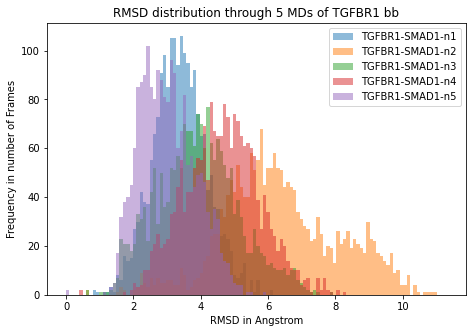

In [ ]:
bin_width = 0.1

# Calculate the number of bins
min_value = int(df.min().min() // bin_width) * bin_width
max_value = int(df.max().max() // bin_width) * bin_width
bins = int((max_value - min_value) / bin_width) + 1

# Plot the histograms for each column
for col in df.columns:
    plt.hist(df[col], bins=bins, range=(min_value, max_value), alpha=0.5, label=col)

# Add the labels and title
plt.xlabel("RMSD in Angstrom")
plt.ylabel("Frequency in number of Frames")
plt.title("RMSD distribution through 5 MDs of TGFBR1 bb")
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = [7.50, 5.00]

# Show the plot
plt.savefig('Bins.png', dpi=600)
plt.show()

Create comparative violin plots using two uploaded data files
including calculation of the p values using t-test (not used but code is provided) and Mann–Whitney U test. The color is given by the first variables. 

Please give the Name of Left-molecule: TGFBR1 L45-loop
Please give the FILENAME of the first Dataset: L45.txt
Please type FILENAME for second-dataset: L3.txt
Please type Name for Right-molecule: SMAD2 L3-loop
Please type Name for X-axis-Text: TGFBR1-SMAD2 docking


<ipython-input-109-b9bd72eaf176>:57: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  group1_std = group1.std()
<ipython-input-109-b9bd72eaf176>:58: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  group2_std = group2.std()


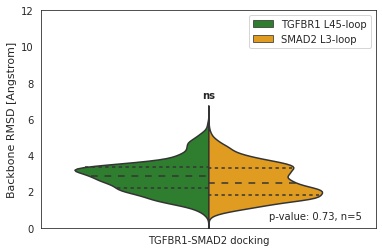

In [ ]:
#the following part ist to plot a comparative violin plot from two different datasets. This can include multiple replica
# Typical data is the output from VMD measurements. 


S1 = "chocolate"
S2 = "orange"
BR1 = "violet"
ALK2 = "yellow"
TBR1 = "forestgreen"


color1 = TBR1
color2 = S2
lessergreater = "less"
# less or greater or two-sided DEPENDING ON: DO WE THING THE LEFT SIDE MOVES ...

user_input = input("Please give the Name of Left-molecule: ")
leftMolec = user_input

user_input = input("Please give the FILENAME of the first Dataset: ")
data1 = user_input

raw_data = pd.read_csv(data1,delimiter='\s+',)
raw_data = raw_data.drop("frame", axis=1)
raw_data = raw_data.melt(var_name='groups', value_name= leftMolec)

user_input = input("Please type FILENAME for second-dataset: ")
measurement_name = user_input

raw_data2 = pd.read_csv(measurement_name,delimiter='\s+',)
raw_data2 = raw_data2.drop("frame", axis=1)

user_input = input("Please type Name for Right-molecule: ")
rightMolec = user_input

raw_data2 = raw_data2.melt(var_name='groupies', value_name= rightMolec)
raw_data = raw_data.join(raw_data2)
raw_data.drop(labels=["groupies"], axis=1, inplace=True)
meltedraw_data = raw_data.melt('groups', var_name='hue', value_name='values')
meltedraw_data

sns.set_style('white')

user_input = input("Please type Name for X-axis-Text: ")
Xtext = user_input

meltedraw_data.insert(3, 'Name', Xtext)
meltedraw_data['values'] = meltedraw_data['values'].apply(pd.to_numeric, errors='coerce')


# following calculates siginificance by t-test
group1 = meltedraw_data[meltedraw_data['hue'] == leftMolec].dropna()
group2 = meltedraw_data[meltedraw_data['hue'] == rightMolec].dropna()
group1_mean = group1['values'].mean()
group2_mean = group2['values'].mean()
# calculate standard deviations
group1_std = group1.std()
group2_std = group2.std()
# calculate sample sizes
n1 = 5
n2 = 5
# calculate the standard error
se = np.sqrt((group1_std**2 / n1) + (group2_std**2 / n2))
# calculate the t-statistic
t = (group1_mean - group2_mean) / se
# calculate the degrees of freedom
df = n1 + n2 - 2
# calculate the p-value
p = stats.t.sf(np.abs(t), df) * 2
p = p.item()


# following calculates significance by mannwithney test, with n=5 for each side. assuming not a standard distribution.
group1 = meltedraw_data[meltedraw_data['hue'] == leftMolec].dropna()
group2 = meltedraw_data[meltedraw_data['hue'] == rightMolec].dropna()
mean_value1 = group1.groupby("groups").mean()
mean_value1['hue'] = group1.groupby("groups")['hue'].first()
mean_value2 = group2.groupby("groups").mean()
mean_value2['hue'] = group2.groupby("groups")['hue'].first()
group1_new = mean_value1[mean_value1['hue'] == leftMolec].dropna()
group2_new = mean_value2[mean_value2['hue'] == rightMolec].dropna()
ranks = rankdata(np.concatenate([group1_new['values'], group2_new['values']]))
ranks_condition1 = ranks[:len(group1_new['values'])]
ranks_condition2 = ranks[len(group1_new['values']):]
U, p_value = mannwhitneyu(ranks_condition1, ranks_condition2, alternative=lessergreater)


#t, p = stats.ttest_ind(group1['values'], group2['values'])
#plot1 = sns.violinplot(x="groups", y="values", data=meltedraw_data, hue="hue", scale='count', inner='quartile', palette="Blues", split=True)
plot1 = sns.violinplot(x="Name", y="values", data=meltedraw_data, hue="hue", scale='area', inner='quartile', palette=[color1, color2], split=True)
plt.ylim([0, 12])
plt.xlabel(None)
x_pos = (plt.xlim()[0] + plt.xlim()[1]) / 2
y_pos = max(meltedraw_data['values']) + 0.7
if p_value < 0.001:
    plt.text(x_pos, y_pos, '***', fontweight='bold', ha='center')
elif p_value < 0.01:
    plt.text(x_pos, y_pos, '**', fontweight='bold', ha='center')
elif p_value < 0.05:
    plt.text(x_pos, y_pos, '*', fontweight='bold', ha='center')
else:
    plt.text(x_pos, y_pos, 'ns', fontweight='bold', ha='center')
plt.text(x_pos + 0.32, 0.5, 'p-value: {:.2}, n=5'.format(p_value), ha='center')
plt.ylabel('Backbone RMSD [Angstrom]', fontdict={'fontsize': 11})
plt.legend(title=None)
plt.savefig('ViolinPlot_RMSD_' + Xtext + '.png', dpi=600)




replot in case some colors need to be changed

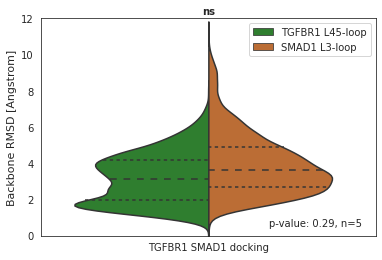

In [ ]:
color1 = TBR1
color2 = S1
lessergreater = "two-sied"
plot1 = sns.violinplot(x="Name", y="values", data=meltedraw_data, hue="hue", scale='area', inner='quartile', palette=[color1, color2], split=True)
plt.ylim([0, 12])
plt.xlabel(None)
x_pos = (plt.xlim()[0] + plt.xlim()[1]) / 2
y_pos = max(meltedraw_data['values']) + 0.9
if p_value < 0.001:
    plt.text(x_pos, y_pos, '***', fontweight='bold', ha='center')
elif p_value < 0.01:
    plt.text(x_pos, y_pos, '**', fontweight='bold', ha='center')
elif p_value < 0.05:
    plt.text(x_pos, y_pos, '*', fontweight='bold', ha='center')
else:
    plt.text(x_pos, y_pos, 'ns', fontweight='bold', ha='center')
plt.text(x_pos + 0.32, 0.5, 'p-value: {:.2}, n=5'.format(p_value), ha='center')
plt.ylabel('Backbone RMSD [Angstrom]', fontdict={'fontsize': 11})
plt.legend(title=None)
plt.savefig('ViolinPlot_RMSD_' + Xtext + '.png', dpi=600)


Create a line plot of all lines superiposed:

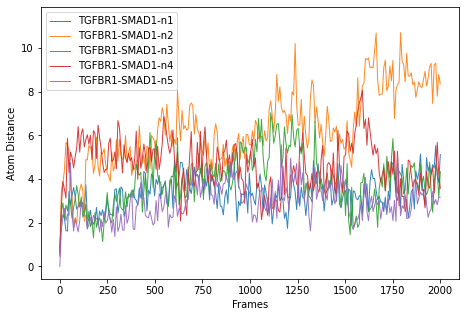

In [ ]:

plot1 = df.plot(alpha=0.90,lw=1)

for n in range(0,5):
  line = plot1.get_lines()[n]
  x = line.get_xdata()
  y = line.get_ydata()
  X_Y_Spline = make_interp_spline(x, y)
  X_ = np.linspace(x.min(), x.max(), 250)
  Y_ = X_Y_Spline(X_)
  line.set_xdata(X_)
  line.set_ydata(Y_)
plt.xlabel('Frames')
plt.ylabel('Atom Distance')
plt.legend(loc='upper left')
plt.savefig('Lines.png', dpi=600)
plt.show()

Als nächstes erstellen wir einen leeren plot, der gleiche axen hat, aber verschiedene subplots

**Optionale SCHWERE Aufgabe**
Man könnte probieren das ganze variabel zu machen je nachdem wie viele spalten die Rohdaten haben (also wie viele Replikas gemessen wurden, da jede Spalte einem Molekül entspricht)... dafür müsste man **1.** die Spaltenzahl herausfinden aus der input datei (bzw **raw_data**, da das ja dort eingelesen wurde), und **2.** dann einen plot konstruieren (wo ich derzeit 3*2, also 6 subplots habe), der am optimalsten diese spaltenzahl darstellt (bei 4 Molekülen 2*2, bei 6 2*3, bei 8 2*4, bei 9 vllt 3*3 usw) KOMPLIZIERT AS FUCK 

<Figure size 1440x878.4 with 0 Axes>

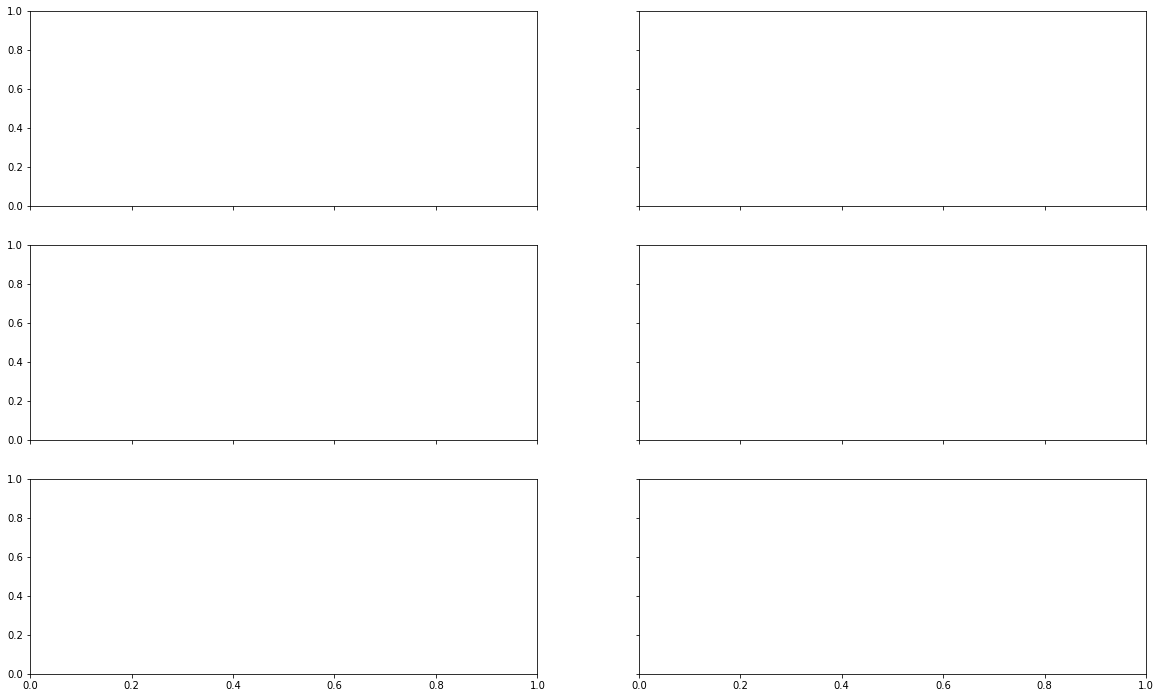

In [ ]:
fig2 = plt.figure()
fig2, axs = plt.subplots(3, 2, sharex=True, sharey=True)


Der nächste Teil ist der aufwändigste, dieser füllt den plot jetzt... versuche dich mal in die for schleife reinzudenken (sie geht von 0 bis 5, also wird 5 mal durchlaufen und jedes mal ist die vairable **n** eins größer... 

Was bedeutet das? was passiert hier?

Die For schleife endet wenn das "eingerückte" nicht mehr da ist (also "plt.savefig() kommt erst nachdem die schleife komplett fertig ist mit allen Durchläufen... Das ist so die schreibweise in python... kann woanders anders sein... also die "einrücker" sind ganz wichtig in Python!

**AUFGABE 2**

den folgenden Plot schöner machen und falls du die vorige aufgabe nicht machtest, manuell so einstellen dass alle 6 mit replikas gefüllt werden? Obwohl 5 replikas reicht, haben wir bisher immer gemacht, also kann eigentlich so bleiben... außer du willst die Daten noch mit reinnehmen... dann probier mal das umzumodeln, dass die for schleife 6 mal durchläuft, und das ünereinandergelagerte vllt woanders geplotted wird...


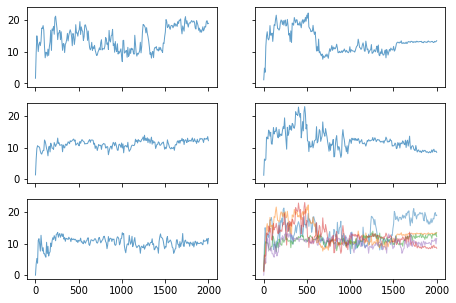

In [ ]:

# die folgende line müssen wir nochmal schreiben auch wenn sie oben schon in einem block steht, 
# anscheinend vergisst er zwischen den Blöcken was los ist
fig2, axs = plt.subplots(3, 2, sharex=True, sharey=True)
for n in range(0,5):
	line = plot1.get_lines()[n]
	x = line.get_xdata()
	y = line.get_ydata()
 
	X_Y_Spline = make_interp_spline(x, y)
	X_ = np.linspace(x.min(), x.max(), 250)
	Y_ = X_Y_Spline(X_)
	b= int(n/2)
	c= int(b+1)
	if n % 2 == 0:
		axs[b, 0].plot(X_, Y_, alpha=0.70,lw=1)
	else: 
		axs[b, 1].plot(X_, Y_, alpha=0.70,lw=1)
	axs[2, 1].plot(X_, Y_, alpha=0.50,lw=1)	
	#plot2 = plt.plot(X_, Y_, alpha=0.70,lw=1)

plt.savefig('Lineplot-distance-over-time-smoothed', dpi=600)


der folgende Teil Code ist nur im Skript wichtig wenn es auf einem Rechner als python script (und nciht hier in colab) läuft, weil sonst unendlich viele Plots offen wären irgendwann... es schließt sie lediglich und zeigt nur einen einzigen...

In [ ]:
def figshow(figure):
    for i in plt.get_fignums():
        if figure != plt.figure(i):
            plt.close(plt.figure(i))
    

figshow(fig2)

Jetzt erstellen wir noch einen letzten Plot, den du auch optisch optimieren kannst (sicherlich viel kopierbar von oben...) wobei die daten erst in zwei spalten "geschmolzen werden:

In [ ]:

df_melted = df.melt(var_name='groups', value_name= 'vals')

print(df_melted)

              groups   vals
0      ALK2-SMAD1-n1  0.556
1      ALK2-SMAD1-n1  0.556
2      ALK2-SMAD1-n1  0.974
3      ALK2-SMAD1-n1  1.153
4      ALK2-SMAD1-n1  1.382
...              ...    ...
10005  ALK2-SMAD1-n5  2.147
10006  ALK2-SMAD1-n5  2.361
10007  ALK2-SMAD1-n5  2.334
10008  ALK2-SMAD1-n5  2.281
10009  ALK2-SMAD1-n5  2.282

[10010 rows x 2 columns]


und jetzt den Plot! 

plt.clf() ist nur zum "clearen" von allen bisherigen plots, damit da keine irgendwo rumfliegen...

In der Zeile danach werden die Daten eingelesen nach groups und vals... (siehe den geschmolzenen datenframe, dann versteht man was was ist...)

**AUFGABE 3** 

Den folgenden plot schöner machen! 


Da sind schonmal möglichkeiten den Plot zu labeln / x-achse zu labeln im code... kannst ja mal mit rumspielen, vielleicht kann man den namen vom Plot auch automatisieren aus dem namen der input-datei? (vielleicht minus das "measurement", aber als name "R5CZ-D161CG" klingt doch ganz vernünftig (although es nicht das Gen numbering ist, sondern ein numbering von der länge der PDB... eigentlich ist R5= R206... und demenstprechen D161 vom SMAD wahrscheinlich auch nicht residue an position 161...

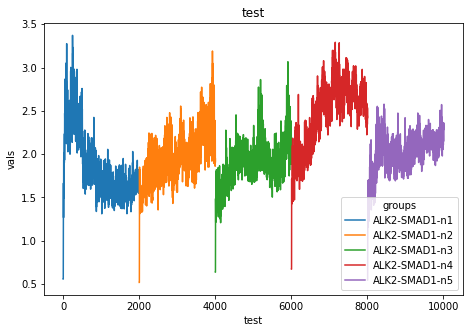

In [ ]:

#4) show side by side plot
plt.clf()
sns.lineplot(x=df_melted.index,y='vals', data=df_melted, hue='groups')
plt.title("test");
plt.xlabel("test");
plt.show()
